## Implementação de carro elétrico acionado por Motor CC com controle da velocidade pela tensão de armadura

### Importação das bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### EDOs das dinâmicas

In [2]:
# Dinâmica do motor

def f1(ia, t, L, Ea, Kv, w, Ra): # derivada da corrente
    return (Ea - Kv * w - Ra * ia) / L

def f2(w, t, J, Kt, ia, b): # derivada da velocidade angular
    return (Kt * ia - b * w) / J

# Dinâmica da translação

def f3(v, t, Kt, ia, r, c, m, g, alpha): # derivada da velocidade
    return (Kt * ia / r - c * v - m * g * np.sin(alpha)) / m

### Parametrização

In [27]:
L = 0.0005 # indutância
Kv = 0.1 # constante de velocidade
Ra = 20e-3 # resistência de armadura

J = 0.0001 # inércia
Kt = 0.1 # constante de torque
b = 0.1 # coeficiente de atrito viscoso

r = 12e-2 # raio da roda
c = 0.01 # coeficiente de atrito viscoso
m = 1 # massa
g = 9.8 # aceleração da gravidade

### Dinâmica do motor para 3 condições iniciais diferentes

In [28]:
ia0 = 0 # condição inicial da corrente
w0 = 0 # condição inicial da velocidade angular
ia = []
w = []
Ea0 = [0, 2, 5] # condições iniciais da tensão de armadura
t = np.linspace(0, 0.15, 30) # vetor de tempo
for i, Ea in enumerate(Ea0):
    ia.append(odeint(f1, ia0, t, args=(L, Ea, Kv, w0, Ra)))
    w.append(odeint(f2, w0, t, args=(J, Kv, ia[i][-1], b)))

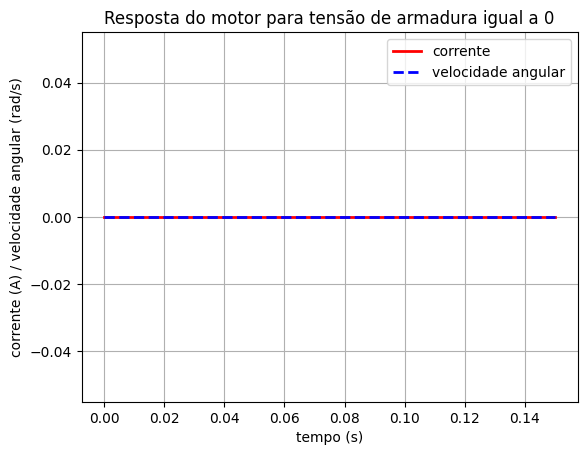

In [20]:
plt.figure()
plt.plot(t, ia[0], 'r-', linewidth=2, label='corrente')
plt.plot(t, w[0], 'b--', linewidth=2, label='velocidade angular')
plt.xlabel('tempo (s)')
plt.ylabel('corrente (A) / velocidade angular (rad/s)')
plt.title('Resposta do motor para tensão de armadura igual a 0')
plt.legend()
plt.grid()
plt.show()

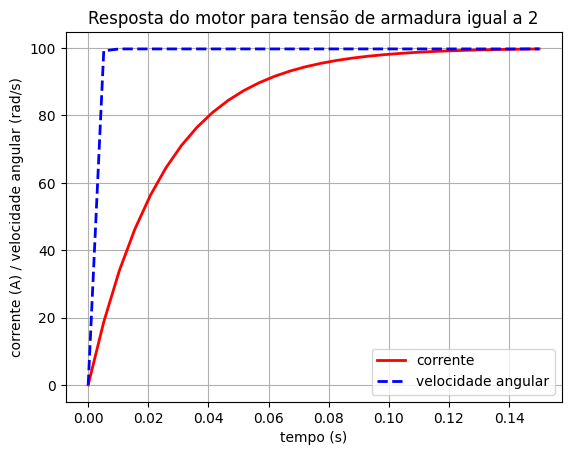

In [29]:
plt.figure()
plt.plot(t, ia[1], 'r-', linewidth=2, label='corrente')
plt.plot(t, w[1], 'b--', linewidth=2, label='velocidade angular')
plt.xlabel('tempo (s)')
plt.ylabel('corrente (A) / velocidade angular (rad/s)')
plt.title('Resposta do motor para tensão de armadura igual a 2')
plt.legend()
plt.grid()
plt.show()

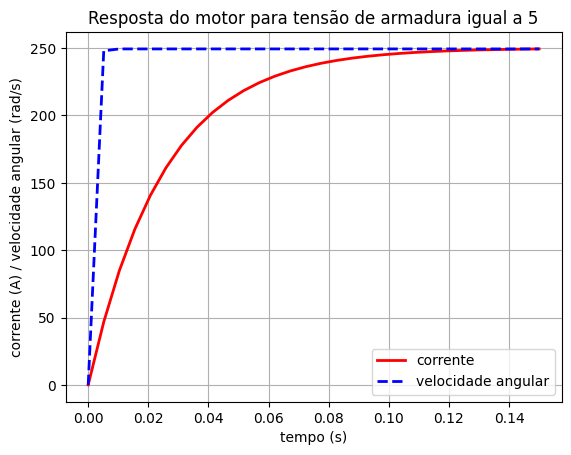

In [30]:
plt.figure()
plt.plot(t, ia[2], 'r-', linewidth=2, label='corrente')
plt.plot(t, w[2], 'b--', linewidth=2, label='velocidade angular')
plt.xlabel('tempo (s)')
plt.ylabel('corrente (A) / velocidade angular (rad/s)')
plt.title('Resposta do motor para tensão de armadura igual a 5')
plt.legend()
plt.grid()
plt.show()

### Adicionando a dinâmica da translação

In [31]:
Ea = 1 # tensão de armadura
alpha = 0 # ângulo de inclinação
ia0 = 0 # condição inicial da corrente
w0 = 0 # condição inicial da velocidade angular
v0 = 0 # condição inicial da velocidade
t = np.linspace(0, 0.15, 30) # vetor de tempo
ia = odeint(f1, ia0, t, args=(L, Ea, Kv, w0, Ra)) # corrente
w = odeint(f2, w0, t, args=(J, Kv, ia[-1], b)) # velocidade angular
v = odeint(f3, v0, t, args=(Kt, ia[-1], r, c, m, g, alpha)) # velocidade

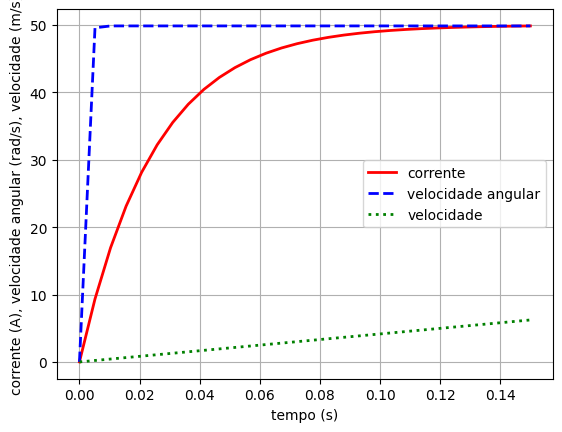

In [32]:
plt.figure()
plt.plot(t, ia, 'r-', linewidth=2, label='corrente')
plt.plot(t, w, 'b--', linewidth=2, label='velocidade angular')
plt.plot(t, v, 'g:', linewidth=2, label='velocidade')
plt.xlabel('tempo (s)')
plt.ylabel('corrente (A), velocidade angular (rad/s), velocidade (m/s)')
plt.legend(loc='best')
plt.grid()
plt.show()

### Implementando a malha de controle

c:\Users\sandr\OneDrive\Documentos\Ufsc - 23.1\Modelagem e Simulação de Processos\TrabFinal_DAS5103\venv\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
c:\Users\sandr\OneDrive\Documentos\Ufsc - 23.1\Modelagem e Simulação de Processos\TrabFinal_DAS5103\venv\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


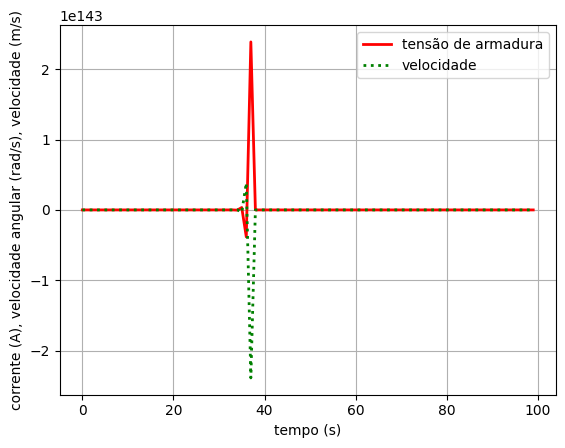

In [34]:
u = [0, 0]
e = [0, 0]
y = [0, 0]
Kp = 1
v_ref = 10
Ea_plot = []
v_plot = []
alpha = 0
ia0 = 0
w0 = 0
v0 = 0
t = np.linspace(0, 0.15, 30)
ia = odeint(f1, ia0, t, args=(L, Ea, Kv, w0, Ra))
w = odeint(f2, w0, t, args=(J, Kv, ia[-1], b))

for k in range(100):
    u[1] = u[0]
    e[1] = e[0]
    y[1] = y[0]
    y[0] = odeint(f3, v0, t, args=(Kt, ia[-1], r, c, m, g, alpha))
    e[0] = v_ref - y[0][-1]
    u[0] = u[1] + Kp * (e[0] - e[1])
    Ea_plot.append(u[0])
    v_plot.append(y[0][-1])
    Ea = u[0]
    ia = odeint(f1, ia0, t, args=(L, Ea, Kv, w[-1], Ra))
    w = odeint(f2, w0, t, args=(J, Kv, ia[-1], b))

plt.figure()
plt.plot(range(100), Ea_plot, 'r-', linewidth=2, label='tensão de armadura')
plt.plot(range(100), v_plot, 'g:', linewidth=2, label='velocidade')
plt.xlabel('tempo (s)')
plt.ylabel('corrente (A), velocidade angular (rad/s), velocidade (m/s)')
plt.legend(loc='best')
plt.grid()
plt.show()